# Projet Steganographie texte dans une image rbv

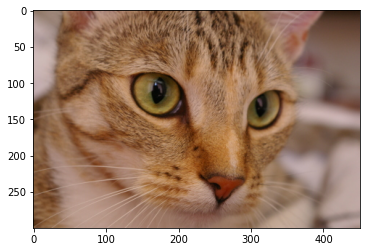

(300, 451, 3)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

img = skimage.data.chelsea()
# img = skimage.color.rgb2gray(img)
plt.imshow(img)
plt.show()
print(img.shape)

## Etape 1 : Transformer chaque caractère en code ASCII puis binaire

In [2]:
message = "Aujourd'hui il fait beau"

In [3]:
def string_to_binaire(message):
    message += "STOP"
    liste_de_binaire = []
    
    for lettre in message :
        lettre_asci = ord(lettre)
        lettre_binaire = bin(lettre_asci)
        lettre_binaire = lettre_binaire[2:].zfill(8)
        liste_de_binaire.append(lettre_binaire)
        
    return liste_de_binaire

liste_binaire = string_to_binaire(message)

def ligne_binaire(liste):
    chiffres = ""
    for i in liste:
        chiffres += i
        
    return chiffres

message_bin_flat = ligne_binaire(liste_binaire)

On remplace le dernier bit de chaque couleur de chaque pixel par les bits qu'on veut cacher

### A modifier ! Ajouter la clé !

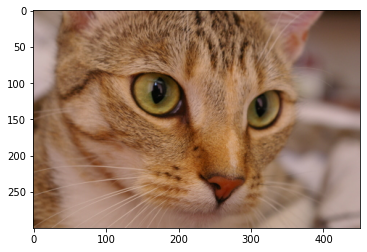

In [4]:
def encoder_image(img, chiffres, *cle):
    # Tableau de string : va contenir les infos en binaire
    img_bin = np.chararray((img.shape[0], img.shape[1], img.shape[2]), itemsize=8)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                img_bin[i,j,k] = bin(img[i,j,k])[2:].zfill(8)
                
    # mettre au bon format le tableau de string
    img_bin = img_bin.decode("utf-8")
    
    # On flatten l'image pour itérer plus facilement
    img_bin_flat = img_bin.flatten()
    img_encoded_bin = img_bin_flat.copy()

    for i in range(len(chiffres)):
        img_encoded_bin[i] = img_encoded_bin[i][:7] + chiffres[i]
        
    img_encoded_bin = np.reshape(img_encoded_bin, img_bin.shape)
    img_encoded = img.copy()
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                img_encoded[i,j,k] = int(img_encoded_bin[i,j,k],2)
        
    return img_encoded

img_encoded = encoder_image(img, message_bin_flat)
plt.imshow(img_encoded)
plt.show()

## Etape 4 : Decoder le message

In [15]:
def find_secret_message(image_encoded):

    # on la met en binaire
    lig, col, couleur =  image_encoded.shape
    image_bin = np.chararray((lig, col, couleur), itemsize=8)

    for i in range(lig):
        for j in range(col):
            for k in range(couleur):
                image_bin[i,j,k] = bin(image_encoded[i,j,k])[2:].zfill(8)

    image_bin = image_bin.decode("utf-8")

    # On récupère les derniers bits de chaque rvb de chaque pixel
    image_bin_flat = image_bin.flatten()

    message_encoded_bin = []
    lsb = ""
    count = 0

    for i in range(1,232):
        lsb += image_bin_flat[i-1][7]

        if ((i%8 == 0) & (i != 0)):
            message_encoded_bin.append(lsb)
            lsb = ""

    message_encoded_ascii = [None]*len(message_encoded_bin)

    for i in range(len(message_encoded_bin)):
        message_encoded_ascii[i] = chr(int(message_encoded_bin[i],2))

    message = ''.join(message_encoded_ascii)

    return message

In [16]:
secret_message = find_secret_message(img_encoded)
print(secret_message)

Aujourd'hui il fait beauSTOP
